# **Prédiction des compétences émergentes**

## **Scraping Linkedin Jobs**



In [ ]:
import pandas as pd
from selenium import webdriver
import time
from tqdm import tqdm

In [ ]:
url = "https://www.linkedin.com/jobs/search/?geoId=102787409&location=Maroc"

### Setting up chromedriver

In [ ]:
driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

<ipython-input-5-a42774da5d20>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")


In [ ]:
driver.get(url)

In [ ]:
no_of_jobs = driver.find_element_by_xpath("//span[@class = 'results-context-header__job-count']").text

<ipython-input-21-ba49fd1e6389>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  no_of_jobs = driver.find_element_by_xpath("//span[@class = 'results-context-header__job-count']").text


In [ ]:
print(no_of_jobs)

3,000


In [ ]:
i = 2
while i<= int(3000/25)+1:

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    i = i + 1
    try:
        driver.find_element_by_xpath("/html/body/div/div/main/section/button").click()
        time.sleep(5)
    except:
         pass
         time.sleep(5)

<ipython-input-279-808731e9de83>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("/html/body/div/div/main/section/button").click()


In [ ]:
job_list = driver.find_element_by_class_name("jobs-search__results-list")
jobs = job_list.find_elements_by_tag_name('li')

<ipython-input-24-11859f7b70a0>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  job_list = driver.find_element_by_class_name("jobs-search__results-list")
C:\ProgramData\Anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


In [ ]:
len(jobs)

997

In [ ]:
job_title = []
company_name = []
date = []
job_link = []

for job in tqdm(jobs):

 
    jt = job.find_element_by_css_selector("h3").get_attribute("innerText")
    job_title.append(jt)
 
    cn = job.find_element_by_css_selector("h4").get_attribute("innerText")
    company_name.append(cn)
 
    dt = job.find_element_by_css_selector("div>div>time").get_attribute("datetime")
    date.append(dt)
 
    jl = job.find_element_by_css_selector("a").get_attribute("href")
    job_link.append(jl)


 13%|██████████▌                                                                     | 131/997 [00:31<03:30,  4.12it/s]


 26%|█████████████████████                                                           | 263/997 [01:00<02:41,  4.54it/s]


 40%|███████████████████████████████▋                                                | 395/997 [01:29<02:03,  4.87it/s]


 53%|██████████████████████████████████████████▎                                     | 527/997 [01:58<01:35,  4.93it/s]


 66%|████████████████████████████████████████████████████▉                           | 659/997 [02:26<01:10,  4.77it/s]


 79%|███████████████████████████████████████████████████████████████▍                | 791/997 [02:54<00:42,  4.81it/s]


 93%|██████████████████████████████████████████████████████████████████████████      | 923/997 [03:23<00:16,  4.41it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [03:38<00:00,  4.55it/s]


In [ ]:
job_data = pd.DataFrame({'title':job_title, 'company_name':company_name, 'date':date, 'job_link':job_link})

job_data.to_csv("/Desktop/job_data.csv", index=False)

In [ ]:
df = pd.read_csv("/Desktop/job_data.csv")

In [ ]:
df.head()

,title,company_name,date,job_link
0,Directeur adjoint -Ouled_Teima,Le Directeur Financier,2022-06-14,https://ma.linkedin.com/jobs/view/directeur-ad...
1,Morocco Summer Internship- Finance,Unilever,2022-06-14,https://ma.linkedin.com/jobs/view/morocco-summ...
2,Superviseur financier,Transsion,2022-06-14,https://ma.linkedin.com/jobs/view/superviseur-...
3,Business Development Manager,TRIANGLE INTERIM,2022-06-14,https://ma.linkedin.com/jobs/view/business-dev...
4,"Assistant administratif, financier et RH H/F",Skill Talent IT,2022-06-14,https://ma.linkedin.com/jobs/view/assistant-ad...


# **Import des librairies**

In [ ]:
import pandas as pd
import re 
import nltk


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer



nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#Data
Linkedin_job_offers = pd.read_csv("/content/Job_offers_dataset.csv", engine='python') 

In [ ]:
data=Linkedin_job_offers['job_description']
data

0      Minimum Required Skills:EDI, TrustedLink, AS2,...
1      InformaticaåÊ/ ETL DeveloperSt, Petersburg, FL...
2      pmayekar@kanandcorp.com 512-697-8897Sunnyvale ...
3      This nationally recognized Microsoft Gold Part...
4      Minimum Required Skills:C#, ASP.NET, SQL, Java...
                             ...                        
453    Ã¢Â€Â¢ A minimum of 2 years of supervisory exp...
454    The ideal candidate will have:  Ã¢Â€Â¢ A creat...
455    Ã¢Â€Â¢ Knowledge of the NYC Construction Code ...
456    Preference given to candidates possessing know...
457    . 5+ years' experience of Middleware Administr...
Name: job_description, Length: 458, dtype: object

# **Manipulations sur les données**

In [ ]:
#preprocessing
def text_preprocess(raw_text):
    
    raw_text = re.sub("@\w+","",raw_text).strip()
    raw_text = re.sub("http\S+","",raw_text).strip()
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    lemma = [lemmatizer.lemmatize(word) for word in meaningful_words]
    return lemma 

In [ ]:
new_data=[]
for raw in data:
    raw=text_preprocess(raw)
    new_data.append(raw)
    print(raw)



['minimum', 'required', 'skill', 'edi', 'trustedlink', 'vanif', 'edi', 'analyst', 'experience', 'please', 'read', 'strong', 'long', 'standing', 'company', 'looking', 'edi', 'analyst', 'team', 'must', 'year', 'edi', 'experience', 'trustedlink', 'environment', 'role', 'work', 'finance', 'department', 'identifying', 'trading', 'partner', 'work', 'closely', 'external', 'customer', 'edi', 'liaison', 'across', 'company', 'also', 'monitor', 'van', 'communication', 'correct', 'error', 'incoming', 'data', 'need', 'positionrequirements', 'year', 'edi', 'experience', 'year', 'trustedlink', 'experience', 'iseries', 'experience', 'van', 'communicationswhat', 'youwe', 'offer', 'strong', 'compensation', 'package', 'benefit', 'local', 'candidate', 'please', 'edi', 'analyst', 'experience', 'please', 'apply', 'today', 'applicant', 'must', 'authorized', 'work', 'u', 'please', 'apply', 'directly', 'clicking', 'click', 'apply', 'word', 'resume', 'looking', 'forward', 'receiving', 'resume', 'going', 'positi

In [ ]:
X = pd.DataFrame()
X['prepared_description'] =new_data
y=Linkedin_job_offers['Year']
X

,prepared_description
0,"[minimum, required, skill, edi, trustedlink, v..."
1,"[informatica, etl, developerst, petersburg, fl..."
2,"[pmayekar, com, sunnyvale, caangular, j, devel..."
3,"[nationally, recognized, microsoft, gold, part..."
4,"[minimum, required, skill, c, asp, net, sql, j..."
...,...
453,"[minimum, year, supervisory, experience, knowl..."
454,"[ideal, candidate, creative, interdisciplinary..."
455,"[knowledge, nyc, construction, code, zoning, r..."
456,"[preference, given, candidate, possessing, kno..."


# **Découper les données**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train)


                                  prepared_description
22   [senior, java, developerlocation, sunnyvalesta...
68   [client, large, brand, name, consumer, medium,...
336  [job, title, sap, project, system, lead, consu...
20   [robert, half, technology, seeking, system, ad...
272  [minimum, required, skill, jquery, knockout, r...
..                                                 ...
323  [q, analyst, looking, mobile, apps, test, engi...
192  [devops, engineer, perm, arlington, va, role, ...
117  [minimum, required, skill, java, javascript, h...
47   [one, teksystems, consulting, client, need, sq...
172  [minimum, required, skill, java, html, cs, jav...

[343 rows x 1 columns]


# **Les unigrammes les plus fréquents**

In [ ]:
#https://dev.to/shyamady/how-to-extract-high-frequency-words-in-nltk-47p1



all_X_data_list=[]
for raw in X['prepared_description']:
    all_X_data_list.append(raw)



######################################
X_train_list=[]
y_train_list=[]

for raw in X_train['prepared_description']:
    X_train_list.append(raw)

for raw in y_train:
    y_train_list.append(raw)

##############################################3
X_test_list=[]
y_test_list=[]

for raw in X_test['prepared_description']:
    X_test_list.append(raw)

for raw in y_test:
    y_test_list.append(raw)
################################################


print(X_train_list)
print(y_train_list)

print('----------------------------------------')

print(X_test_list)
print(y_test_list)

print('----------------------------------------')

##############################################################

#print(bag_keys)

joined_new_data=[]
for i in range(len(all_X_data_list)):
  joined_new_data+=all_X_data_list[i]

freq = nltk.FreqDist(joined_new_data)

bag_keys=[]
for tuple in freq.most_common(200):
  bag_keys.append(tuple[0])

print(freq.most_common(200))

joined_new_data



[['senior', 'java', 'developerlocation', 'sunnyvalestart', 'date', 'immediatelypay', 'rate', 'hour', 'w', 'innovation', 'center', 'csv', 'changing', 'way', 'america', 'view', 'entertainment', 'literally', 'love', 'cutting', 'edge', 'would', 'love', 'part', 'changing', 'comcast', 'history', 'looking', 'software', 'engineer', 'passionate', 'cloud', 'deployment', 'scalability', 'join', 'x', 'sport', 'team', 'experience', 'building', 'debugging', 'scalable', 'cloud', 'based', 'java', 'application', 'excited', 'possibility', 'exist', 'intersection', 'sport', 'medium', 'entertainment', 'would', 'like', 'impact', 'million', 'user', 'look', 'love', 'make', 'difference', 'customer', 'life', 'like', 'work', 'hard', 'worth', 'fun', 'great', 'group', 'people', 'amazing', 'work', 'environment', 'future', 'awesome', 'responsibility', 'develop', 'software', 'support', 'deployment', 'operation', 'sport', 'application', 'related', 'infrastructure', 'x', 'entertainment', 'operating', 'system', 'apply', 

['minimum',
 'required',
 'skill',
 'edi',
 'trustedlink',
 'vanif',
 'edi',
 'analyst',
 'experience',
 'please',
 'read',
 'strong',
 'long',
 'standing',
 'company',
 'looking',
 'edi',
 'analyst',
 'team',
 'must',
 'year',
 'edi',
 'experience',
 'trustedlink',
 'environment',
 'role',
 'work',
 'finance',
 'department',
 'identifying',
 'trading',
 'partner',
 'work',
 'closely',
 'external',
 'customer',
 'edi',
 'liaison',
 'across',
 'company',
 'also',
 'monitor',
 'van',
 'communication',
 'correct',
 'error',
 'incoming',
 'data',
 'need',
 'positionrequirements',
 'year',
 'edi',
 'experience',
 'year',
 'trustedlink',
 'experience',
 'iseries',
 'experience',
 'van',
 'communicationswhat',
 'youwe',
 'offer',
 'strong',
 'compensation',
 'package',
 'benefit',
 'local',
 'candidate',
 'please',
 'edi',
 'analyst',
 'experience',
 'please',
 'apply',
 'today',
 'applicant',
 'must',
 'authorized',
 'work',
 'u',
 'please',
 'apply',
 'directly',
 'clicking',
 'click',
 'ap

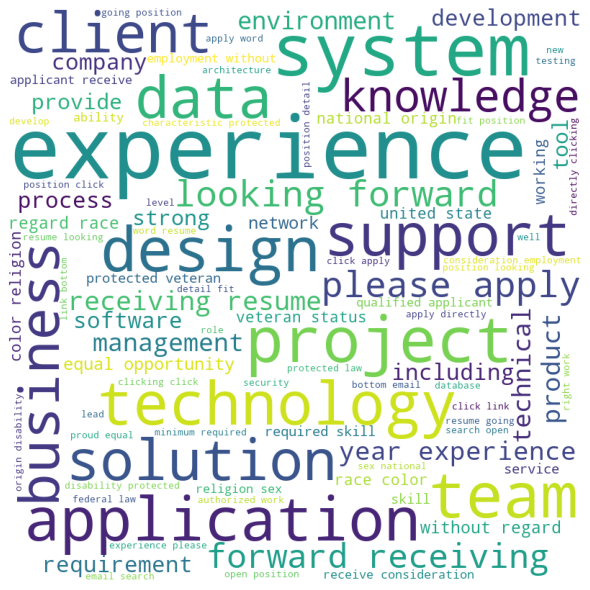

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

words=''
words += " ".join(joined_new_data)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **Former la matrice sparse** 

In [ ]:
#sparse:https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e
#https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/
#https://stackoverflow.com/questions/12453580/how-do-i-concatenate-items-in-a-list-to-a-single-string
#https://medium.com/analytics-vidhya/implementation-of-bag-of-words-nlp-397f4cf67970

#Training data


def data_bag_words(X_list):
  result_bag=[]
  for r in X_list:
    result=' '.join(r)
    result_bag.append(result)
  return result_bag

X_train_data_bag_words=data_bag_words(X_train_list)
X_test_data_bag_words=data_bag_words(X_test_list)

print(X_train_data_bag_words)
  
print('-------------------------------------------------------------')



# Create our vectorizer
countvectorizer = CountVectorizer(binary=True)
# data that we wish to fix
countvectorizer.fit(bag_keys)

# This will print out a list of words used, and their index in the vectors
print('Vocabulary: ')
print(countvectorizer.vocabulary_)


print('---------------------------------------------------------------')

# if we wanted to get multiple vectors at once to build matrices of the train data
sparse_matrix_X_train=countvectorizer.transform(X_train_data_bag_words).toarray()
print('sparse_matrix_X_train')
print(sparse_matrix_X_train)


print('---------------------------------------------------------------')

#get multiple vectors at once to build matrices of the test data
sparse_matrix_X_test=countvectorizer.transform(X_test_data_bag_words).toarray()
print('sparse_matrix_X_test')
print(sparse_matrix_X_test)




['senior java developerlocation sunnyvalestart date immediatelypay rate hour w innovation center csv changing way america view entertainment literally love cutting edge would love part changing comcast history looking software engineer passionate cloud deployment scalability join x sport team experience building debugging scalable cloud based java application excited possibility exist intersection sport medium entertainment would like impact million user look love make difference customer life like work hard worth fun great group people amazing work environment future awesome responsibility develop software support deployment operation sport application related infrastructure x entertainment operating system apply industry best practice software standard technology complex business problem diagnose address performance bottleneck key member top notch engineering team delivers high performance reliable software service apis consumer facing product enhance build tool script continuous int

# **Construction du modèle** 

In [ ]:
#Building the model
#https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/#:~:text=In%20Python%2C%20Lasso%20regression%20can,being%20used%20in%20the%20model.
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
#http://hunterheidenreich.com/blog/nlp-count-vectorization/#rest_code_4d62a18c50a347369d5948b09c4971f9-63

from sklearn import linear_model
from sklearn import metrics

clf =linear_model.Lasso(alpha=0.05)

#  Train the classifier
clf.fit(sparse_matrix_X_train,y_train_list)

#Create the model score:
#acc_score = clf.score(sparse_matrix_X_test,y_test_list)
#print(acc_score)


Lasso(alpha=0.05)

In [ ]:
clf.coef_

array([ 0.31256284, -0.        ,  0.        , -0.        , -0.39736266,
       -0.0046693 , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.54170445,  0.        , -0.        , -0.36898854,
        0.42607692, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.2851615 , -0.        , -0.        , -0.10397928, -0.        ,
       -0.        , -0.01530614,  0.        ,  0.        , -0.29881088,
       -0.41336173, -0.        , -0.        , -0.        , -0.        ,
       -0.11020667, -0.        ,  0.        , -0.        , -0.03094603,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.23507762, -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

# **Résultats**

In [ ]:
#words_importance


importance_of_each_frequent_word=[]

for i in range(len(clf.coef_)):
  word=list(countvectorizer.vocabulary_.keys())[list(countvectorizer.vocabulary_.values()).index(i)]
  importance_of_each_frequent_word.append([word,clf.coef_[i]])

importance_of_each_frequent_word

[['ability', 0.31256283632739645],
 ['able', -0.0],
 ['analysis', 0.0],
 ['applicant', -0.0],
 ['application', -0.39736265712401275],
 ['apply', -0.004669300005691591],
 ['architecture', -0.0],
 ['area', 0.0],
 ['authorized', -0.0],
 ['based', 0.0],
 ['benefit', -0.0],
 ['best', -0.0],
 ['bottom', -0.0],
 ['build', -0.0],
 ['building', 0.0],
 ['business', -0.0],
 ['candidate', 0.0],
 ['career', -0.0],
 ['characteristic', -0.0],
 ['click', -0.0],
 ['clicking', -0.0],
 ['client', -0.5417044477815425],
 ['code', 0.0],
 ['color', -0.0],
 ['com', -0.36898854450158425],
 ['communication', 0.42607692272606174],
 ['company', -0.0],
 ['complete', -0.0],
 ['complex', -0.0],
 ['compliance', -0.0],
 ['computer', 0.0],
 ['consideration', -0.0],
 ['consultant', 0.0],
 ['contract', -0.0],
 ['copyright', -0.0],
 ['customer', -0.28516150122633316],
 ['cybercoders', -0.0],
 ['cybercoderscybercoders', -0.0],
 ['data', -0.10397927843652316],
 ['database', -0.0],
 ['degree', -0.0],
 ['design', -0.015306139